In [81]:
import numpy as np
import os
os.chdir('../')
import matplotlib.pyplot as plt
%matplotlib inline

### 一.最大熵原理
最大熵的思想很朴素，即将已知事实以外的未知部分看做“等可能”的，而熵是描述“等可能”大小很合适的量化指标，熵的公式如下：  

$$
H(p)=-\sum_{i}p_i log p_i
$$  

这里分布$p$的取值有$i$种情况，每种情况的概率为$p_i$，下图绘制了二值随机变量的熵：

In [82]:
p=np.linspace(0.1,0.9,90)

In [83]:
def entropy(p):
    return -np.log(p)*p-np.log(1-p)*(1-p)

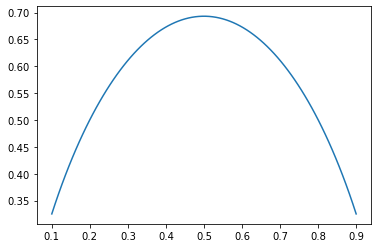

In [84]:
plt.plot(p,entropy(p))

当两者概率均为0.5时，熵取得最大值，通过最大化熵，可以使得分布更“等可能”；另外，熵还有优秀的性质，它是一个凹函数，所以最大化熵其实是一个凸问题。  

对于“已知事实”，可以用约束条件来描述，比如4个值的随机变量分布，其中已知$p_1+p_2=0.4$，它的求解可以表述如下：  

$$
\max_{p} -\sum_{i=1}^4 p_ilogp_i \\
s.t. p_1+p_2=0.4\\
p_i\geq 0,i=1,2,3,4\\
\sum_i p_i=1
$$  
显然，最优解为：$p_1=0.2,p_2=0.2,p_3=0.3,p_4=0.3$

### 二.最大熵模型
最大熵模型是最大熵原理在分类问题上的应用，它假设分类模型是一个条件概率分布$P(Y|X)$，即对于给定的输入$X$，以概率$P(Y|X)$输出$Y$，这时最大熵模型的目标函数定义为条件熵：  

$$
H(P)=-\sum_{x,y}\tilde{P}(x)P(y|x)logP(y|x)
$$  

这里，$\tilde{P}(x)$表示边缘分布$P(X)$的经验分布，$\tilde{P}(x)=\frac{v(X=x)}{N}$，$v(X=x)$表示训练样本中输入$x$出现的次数，$N$表示训练样本的总数。  

而最大熵模型的“已知事实”可以通过如下等式来约束：  

$$
\sum_{x,y}\tilde{P}(x)P(y|x)f(x,y)=\sum_{x,y}\tilde{P}(x,y)f(x,y)
$$

为了方便，左边式子记着$E_P(f)$，右边式子记着$E_{\tilde{P}}(f)$，等式描述的是某函数$f(x,y)$关于模型$P(Y|X)$与经验分布$\tilde{P}(X)$的期望与函数$f(x,y)$关于经验分布$\tilde{P}(X,Y)$的期望相同。(这里$\tilde{P}(x,y)=\frac{v(X=x,Y=y)}{N}$)  
所以重要的约束信息将由$f(x,y)$来表示，它的定义如下：  
$$
f(x,y)=\left\{\begin{matrix}
1 & x与y满足某一事实\\ 
0 & 否则
\end{matrix}\right.
$$  

故最大熵模型可以理解为，模型在某些事实发生的期望和训练集相同的条件下，使得条件熵最大化。所以，对于有$n$个约束条件的最大熵模型可以表示为：  

$$
\max_P -\sum_{x,y}\tilde{P}(x)P(y|x)logP(y|x) \\
s.t. E_P(f_i)=E_{\tilde{P}}(f_i),i=1,2,...,n\\
\sum_y P(y|x)=1
$$  

按照优化问题的习惯，可以改写为如下：  

$$
\min_P \sum_{x,y}\tilde{P}(x)P(y|x)logP(y|x) \\
s.t. E_P(f_i)-E_{\tilde{P}}(f_i)=0,i=1,2,...,n\\
\sum_y P(y|x)-1=0
$$  

由于目标函数为凸函数，约束条件为仿射，所以我们可以通过求解对偶问题，得到原始问题的最优解，首先引入拉格朗日乘子$w_0,w_1,...,w_n$，定义拉格朗日函数$L(P,w)$：  

$$
L(P,w)=-H(P)+w_0(1-\sum_yP(y|x)+\sum_{i=1}^nw_i(E_{\tilde{P}}(f_i))-E_P(f_i))
$$  

所以原问题等价于：  
$$
\min_P\max_w L(P,w)
$$  
它的对偶问题：  
$$
\max_w\min_P L(P,w)
$$  

首先，解里面的 $\min_P L(P,w)$，其实对于$\forall w$，$L(P,w)$都是关于$P$的凸函数，因为$-H(P)$是关于$P$的凸函数，而后面的$w_0(1-\sum_yP(y|x)+\sum_{i=1}^nw_i(E_{\tilde{P}}(f_i))-E_P(f_i))$是关于$P(y|x)$的仿射函数，所以求$L(P,w)$对$P$的偏导数，并令其等于0，即可解得最优的$P(y|x)$,记为$P_w(y|x)$，即：  
$$
\frac{\partial L(P,w)}{\partial P(y|x)}=\sum_{x,y}\tilde{P}(x)(logP(y|x)+1)-\sum_yw_0+\sum_{i=1}^n\sum_{x,y}\tilde{P}(x)f_i(x,y)w_i\\
=\sum_{x,y}\tilde{P}(x)(logP(y|x)+1-w_0-\sum_{i=1}^nw_if_i(x,y))\\
=0
$$  

在训练集中对任意样本$\forall x,y$，都有$\tilde{P}(x)(logP(y|x)+1-w_0-\sum_{i=1}^nw_if_i(x,y))=0$，显然$\tilde{P}(x)>0$($x$本来就是训练集中的一个样本，自然概率大于0)，所以$logP(y|x)+1-w_0-\sum_{i=1}^nw_if_i(x,y)=0$，所以：  
$$
P_w(y|x)=exp(\sum_{i=1}^nw_if_i(x,y)+w_0-1)\\
=\frac{exp(\sum_{i=1}^nw_if_i(x,y))}{exp(1-w_0)}\\
    =\frac{exp(\sum_{i=1}^nw_if_i(x,y))}{\sum_y exp(\sum_{i=1}^nw_if_i(x,y))}
$$  

这就是最大熵模型的表达式（最后一步变换用到了$\sum_y P(y|x)=1$），这里$w$即是模型的参数，聪明的童鞋其实已经发现，最大熵模型其实就是一个线性函数外面套了一个**softmax**函数，它大概就是如下图所示的这么回事：  
![avatar](./source/05_最大熵模型.svg)

接下来，将$L(P_w,w)$带入外层的$max$函数，即可求解最优的参数$w^*$：  

$$
w^*=arg\max_w L(P_w,w)
$$  

推导一下模型的梯度更新公式：  
$$
L(P_w,w)=\sum_{x,y}\tilde{P}(x)P_w(y|x)logP_w(y|x)+\sum_{i=1}^nw_i\sum_{x,y}(\tilde{P}(x,y)f_i(x,y)-\tilde{P}(x)P_w(y|x)f_i(x,y))\\
=\sum_{x,y}\tilde{P}(x,y)\sum_{i=1}^nw_if_i(x,y)+\sum_{x,y}\tilde{P}(x)P_w(y|x)(logP_w(y|x)-\sum_{i=1}^nw_if_i(x,y))\\
=\sum_{x,y}\tilde{P}(x,y)\sum_{i=1}^nw_if_i(x,y)-\sum_{x,y}\tilde{P}(x)P_w(y|x)log(\sum_{y^{'}}exp(\sum_{i=1}^nw_if_i(x,y^{'})))\\
=\sum_{x,y}\tilde{P}(x,y)\sum_{i=1}^nw_if_i(x,y)-\sum_{x}\tilde{P}(x)log(\sum_{y^{'}}exp(\sum_{i=1}^nw_if_i(x,y^{'})))\\
=\sum_{x,y}\tilde{P}(x,y)w^Tf(x,y)-\sum_{x}\tilde{P}(x)log(\sum_{y^{'}}exp(w^Tf(x,y^{'})))
$$  
这里，倒数第三步到倒数第二步用到了$\sum_yP(y|x)=1$，最后一步中$w=[w_1,w_2,...,w_n]^T,f(x,y)=[f_1(x,y),f_2(x,y),...,f_n(x,y)]^T$，所以：  
$$
\frac{\partial L(P_w,w)}{\partial w}=\sum_{x,y}\tilde{P}(x,y)f(x,y)-\sum_x\tilde{P}(x)\frac{exp(w^Tf(x,y))f(x,y)}{\sum_{y^{'}}exp(w^Tf(x,y^{'}))} 
$$  

所以，自然$w$的更新公式：  
$$
w=w+\eta\frac{\partial L(P_w,w)}{\partial w}
$$  
这里，$\eta$是学习率

### 三.对特征函数的进一步理解
上面推导出了最大熵模型的梯度更新公式，想必大家对$f(x,y)$还是有点疑惑，**“满足某一事实”**这句话该如何理解？这其实与我们的学习目的相关，学习目的决定了我们的**“事实”**，比如有这样一个任务，判断“打”这个词是量词还是动词，我们收集了如下的语料：  

| 句子/$x$ |  目标/$y$  |
|-|-|
| $x_1:$一打火柴 |  $y_1:$量词 |
|  $x_2:$三打啤酒 |  $y_2:$量词 |
|  $x_3:$打电话 | $y_3:$ 动词 |
|  $x_4:$打篮球 | $y_4:$ 动词 |  

通过观察，我们可以设计如下的两个特征函数来分别识别"量词"和"动词"任务：  
$$
f_1(x,y)=\left\{\begin{matrix}
1 & "打"前是数字\\ 
0 & 否则
\end{matrix}\right.
$$  

$$
f_2(x,y)=\left\{\begin{matrix}
1 & "打"后是名词，且前面无数字\\ 
0 & 否则
\end{matrix}\right.
$$  

当然，你也可以设计这样的特征函数来做识别“量词”的任务：  
$$
f(x,y)=\left\{\begin{matrix}
1 & "打"前是"一","打"后是"火柴"\\ 
0 & 否则
\end{matrix}\right.
$$  

$$
f(x,y)=\left\{\begin{matrix}
1 & "打"前是"三","打"后是"啤酒"\\ 
0 & 否则
\end{matrix}\right.
$$  
只是，这样的特征函数设计会使得模型学习能力变弱，比如遇到“三打火柴”，采用后面的特征函数设计就识别不出“打”是量词，而采用第一种特征函数设计就能很好的识别出来，所以要使模型具有更好的泛化能力，就需要设计更好的特征函数，而这往往依赖于人工经验，对于自然语言处理这类任务（比如上面的例子），我们可以较容易的归纳总结出一些有用的经验知识，但是对于其他情况，人工往往难以总结出一般性的规律，所以对于这些问题，我们需要设计更**“一般”**的特征函数。  
#### 一种简单的特征函数设计
我们可以简单考虑$x$的某个特征取某个值和$y$取某个类的组合做特征函数（对于连续型特征，可以采用分箱操作），所以我们可以设计这样两类特征函数：  

（1）离散型：  
$$
f(x,y)=\left\{\begin{matrix}
1 & x_i=某值,y=某类\\ 
0 & 否则
\end{matrix}\right.
$$  

（2）连续型：  
$$
f(x,y)=\left\{\begin{matrix}
1 & 某值1\leq x_i< 某值2,y=某类\\ 
0 & 否则
\end{matrix}\right.
$$ 

 ### 四.代码实现
为了方便演示，首先构建训练数据和测试数据

In [85]:
# 测试
from sklearn import datasets
from sklearn import model_selection
from sklearn.metrics import f1_score

iris = datasets.load_iris()
data = iris['data']
target = iris['target']
X_train, X_test, y_train, y_test = model_selection.train_test_split(data, target, test_size=0.2,random_state=0)
print(X_train.shape,y_train.shape)
print(np.unique(y_train))

(120, 4) (120,)
[0 1 2]


为了方便对数据进行分箱操作，封装一个DataBinWrapper类，并对X_train和X_test进行转换（该类放到ml_models.wrapper_models中）

In [86]:
class DataBinWrapper(object):
    def __init__(self, max_bins=10):
        # 分段数
        self.max_bins = max_bins
        # 记录x各个特征的分段区间
        self.XrangeMap = None

    def fit(self, x):
        n_sample, n_feature = x.shape
        # 构建分段数据
        self.XrangeMap = [[] for _ in range(0, n_feature)]
        for index in range(0, n_feature):
            tmp = x[:, index]
            for percent in range(1, self.max_bins):
                percent_value = np.percentile(tmp, (1.0 * percent / self.max_bins) * 100.0 // 1)
                self.XrangeMap[index].append(percent_value)

    def transform(self, x):
        """
        抽取x_bin_index
        :param x:
        :return:
        """
        if x.ndim == 1:
            return np.asarray([np.digitize(x[i], self.XrangeMap[i]) for i in range(0, x.size)])
        else:
            return np.asarray([np.digitize(x[:, i], self.XrangeMap[i]) for i in range(0, x.shape[1])]).T

In [87]:
data_bin_wrapper=DataBinWrapper(max_bins=10)
data_bin_wrapper.fit(X_train)
X_train=data_bin_wrapper.transform(X_train)
X_test=data_bin_wrapper.transform(X_test)

In [88]:
X_train[:5,:]

array([[7, 6, 8, 7],
       [3, 5, 5, 6],
       [2, 8, 2, 2],
       [6, 5, 6, 7],
       [7, 2, 8, 8]])

In [89]:
X_test[:5,:]

array([[5, 2, 7, 9],
       [5, 0, 4, 3],
       [3, 9, 1, 2],
       [9, 3, 9, 7],
       [1, 8, 2, 2]])

由于特征函数可以有不同的形式，这里我们将特征函数解耦出来，构造一个SimpleFeatureFunction类（后续构造其他复杂的特征函数，需要定义和该类相同的函数名，该类放置到ml_models.linear_model中）

In [90]:
class SimpleFeatureFunction(object):
    def __init__(self):
        """
        记录特征函数
        {
            (x_index,x_value,y_index)
        }
        """
        self.feature_funcs = set()

    # 构建特征函数
    def build_feature_funcs(self, X, y):
        n_sample, _ = X.shape
        for index in range(0, n_sample):
            x = X[index, :].tolist()
            for feature_index in range(0, len(x)):
                self.feature_funcs.add(tuple([feature_index, x[feature_index], y[index]]))

    # 获取特征函数总数
    def get_feature_funcs_num(self):
        return len(self.feature_funcs)

    # 分别命中了那几个特征函数
    def match_feature_funcs_indices(self, x, y):
        match_indices = []
        index = 0
        for feature_index, feature_value, feature_y in self.feature_funcs:
            if feature_y == y and x[feature_index] == feature_value:
                match_indices.append(index)
            index += 1
        return match_indices

接下来对MaxEnt类进行实现，首先实现一个softmax函数的功能(ml_models.utils)

In [91]:
def softmax(x):
    if x.ndim == 1:
        return np.exp(x) / np.exp(x).sum()
    else:
        return np.exp(x) / np.exp(x).sum(axis=1, keepdims=True)

进行MaxEnt类的具体实现（ml_models.linear_model）

In [95]:
from ml_models import utils
class MaxEnt(object):
    def __init__(self, feature_func, epochs=5, eta=0.01):
        self.feature_func = feature_func
        self.epochs = epochs
        self.eta = eta

        self.class_num = None
        """
        记录联合概率分布:
        {
            (x_0,x_1,...,x_p,y_index):p
        }
        """
        self.Pxy = {}
        """
        记录边缘概率分布:
        {
            (x_0,x_1,...,x_p):p
        }
        """
        self.Px = {}

        """
        w[i]-->feature_func[i]
        """
        self.w = None

    def init_params(self, X, y):
        """
        初始化相应的数据
        :return:
        """
        n_sample, n_feature = X.shape
        self.class_num = np.max(y) + 1

        # 初始化联合概率分布、边缘概率分布、特征函数
        for index in range(0, n_sample):
            range_indices = X[index, :].tolist()

            if self.Px.get(tuple(range_indices)) is None:
                self.Px[tuple(range_indices)] = 1
            else:
                self.Px[tuple(range_indices)] += 1

            if self.Pxy.get(tuple(range_indices + [y[index]])) is None:
                self.Pxy[tuple(range_indices + [y[index]])] = 1
            else:
                self.Pxy[tuple(range_indices + [y[index]])] += 1

        for key, value in self.Pxy.items():
            self.Pxy[key] = 1.0 * self.Pxy[key] / n_sample
        for key, value in self.Px.items():
            self.Px[key] = 1.0 * self.Px[key] / n_sample

        # 初始化参数权重
        self.w = np.zeros(self.feature_func.get_feature_funcs_num())

    def _sum_exp_w_on_all_y(self, x):
        """
        sum_y exp(self._sum_w_on_feature_funcs(x))
        :param x:
        :return:
        """
        sum_w = 0
        for y in range(0, self.class_num):
            tmp_w = self._sum_exp_w_on_y(x, y)
            sum_w += tmp_w
        return sum_w

    def _sum_exp_w_on_y(self, x, y):
        tmp_w = 0
        match_feature_func_indices = self.feature_func.match_feature_funcs_indices(x, y)
        for match_feature_func_index in match_feature_func_indices:
            tmp_w += self.w[match_feature_func_index]
        return np.exp(tmp_w)
    
    def _P_w_y_conditioned_x(self,x,y):
        return self._sum_exp_w_on_y(x,y) / (1e-7 + self._sum_exp_w_on_all_y(x))

    def fit(self, X, y):
        self.eta = max(1.0 / np.sqrt(X.shape[0]), self.eta)
        self.init_params(X, y)
        x_y = np.c_[X, y]
        for epoch in range(self.epochs):
            count = 0
            np.random.shuffle(x_y)
            for index in range(x_y.shape[0]):
                count += 1
                x_point = x_y[index, :-1]
                y_point = x_y[index, -1:][0]
                # 获取联合概率分布
                p_xy = self.Pxy.get(tuple(x_point.tolist() + [y_point]))
                # 获取边缘概率分布
                p_x = self.Px.get(tuple(x_point))
                # 更新w
                dw = np.zeros(shape=self.w.shape)
                match_feature_func_indices = self.feature_func.match_feature_funcs_indices(x_point, y_point)
                if len(match_feature_func_indices) == 0:
                    continue
                if p_xy is not None:
                    for match_feature_func_index in match_feature_func_indices:
                        dw[match_feature_func_index] = p_xy
                
                if p_x is not None:
                    for y_i in range(self.class_num):
                        match_func_indices = self.feature_func.match_feature_funcs_indices(x_point,y_i)
                        for index in match_func_indices:
                            dw[index] -= p_x * self._P_w_y_conditioned_x(x_point,y_i)
                # 更新
                self.w += self.eta * dw
                # 打印训练进度
                if count % (X.shape[0] // 4) == 0:
                    print("processing:\tepoch:" + str(epoch + 1) + "/" + str(self.epochs) + ",percent:" + str(
                        count) + "/" + str(X.shape[0]))

    def predict_proba(self, x):
        """
        预测为y的概率分布
        :param x:
        :return:
        """
        y = []
        for x_point in x:
            y_tmp = []
            for y_index in range(0, self.class_num):
                match_feature_func_indices = self.feature_func.match_feature_funcs_indices(x_point, y_index)
                tmp = 0
                for match_feature_func_index in match_feature_func_indices:
                    tmp += self.w[match_feature_func_index]
                y_tmp.append(tmp)
            y.append(y_tmp)
        return utils.softmax(np.asarray(y))

    def predict(self, x):
        return np.argmax(self.predict_proba(x), axis=1)

In [96]:
# 构建特征函数类
feature_func=SimpleFeatureFunction()
feature_func.build_feature_funcs(X_train,y_train)

maxEnt = MaxEnt(feature_func=feature_func)
maxEnt.fit(X_train, y_train)
y = maxEnt.predict(X_test)

print('f1:', f1_score(y_test, y, average='macro'))

processing:	epoch:1/5,percent:30/120
processing:	epoch:1/5,percent:60/120
processing:	epoch:1/5,percent:90/120
processing:	epoch:1/5,percent:120/120
processing:	epoch:2/5,percent:30/120
processing:	epoch:2/5,percent:60/120
processing:	epoch:2/5,percent:90/120
processing:	epoch:2/5,percent:120/120
processing:	epoch:3/5,percent:30/120
processing:	epoch:3/5,percent:60/120
processing:	epoch:3/5,percent:90/120
processing:	epoch:3/5,percent:120/120
processing:	epoch:4/5,percent:30/120
processing:	epoch:4/5,percent:60/120
processing:	epoch:4/5,percent:90/120
processing:	epoch:4/5,percent:120/120
processing:	epoch:5/5,percent:30/120
processing:	epoch:5/5,percent:60/120
processing:	epoch:5/5,percent:90/120
processing:	epoch:5/5,percent:120/120
f1: 0.9188034188034188


通过前面的分析，我们知道特征函数的复杂程度决定了模型的复杂度，下面我们添加更复杂的特征函数来增强MaxEnt的效果，上面的特征函数仅考虑了单个特征与目标的关系，我们进一步考虑二个特征与目标的关系，即：  

$$
f(x,y)=\left\{\begin{matrix}
1 & x_i=某值,x_j=某值,y=某类\\ 
0 & 否则
\end{matrix}\right.
$$  

如此，我们可以定义一个新的UserDefineFeatureFunction类（**注意:类中的方法名称要和SimpleFeatureFunction一样**）

In [94]:
class UserDefineFeatureFunction(object):
    def __init__(self):
        """
        记录特征函数
        {
            (x_index1,x_value1,x_index2,x_value2,y_index)
        }
        """
        self.feature_funcs = set()

    # 构建特征函数
    def build_feature_funcs(self, X, y):
        n_sample, _ = X.shape
        for index in range(0, n_sample):
            x = X[index, :].tolist()
            for feature_index in range(0, len(x)):
                self.feature_funcs.add(tuple([feature_index, x[feature_index], y[index]]))
                for new_feature_index in range(0,len(x)):
                    if feature_index!=new_feature_index:
                        self.feature_funcs.add(tuple([feature_index, x[feature_index],new_feature_index,x[new_feature_index],y[index]]))

    # 获取特征函数总数
    def get_feature_funcs_num(self):
        return len(self.feature_funcs)

    # 分别命中了那几个特征函数
    def match_feature_funcs_indices(self, x, y):
        match_indices = []
        index = 0
        for item in self.feature_funcs:
            if len(item)==5:
                feature_index1, feature_value1,feature_index2,feature_value2, feature_y=item
                if feature_y == y and x[feature_index1] == feature_value1 and x[feature_index2]==feature_value2:
                    match_indices.append(index)
            else:
                feature_index1, feature_value1, feature_y=item
                if feature_y == y and x[feature_index1] == feature_value1:
                    match_indices.append(index)
            index += 1
        return match_indices

In [80]:
# 检验
feature_func=UserDefineFeatureFunction()
feature_func.build_feature_funcs(X_train,y_train)

maxEnt = MaxEnt(feature_func=feature_func)
maxEnt.fit(X_train, y_train)
y = maxEnt.predict(X_test)

print('f1:', f1_score(y_test, y, average='macro'))

processing:	epoch:1/5,percent:30/120
processing:	epoch:1/5,percent:60/120
processing:	epoch:1/5,percent:90/120
processing:	epoch:1/5,percent:120/120
processing:	epoch:2/5,percent:30/120
processing:	epoch:2/5,percent:60/120
processing:	epoch:2/5,percent:90/120
processing:	epoch:2/5,percent:120/120
processing:	epoch:3/5,percent:30/120
processing:	epoch:3/5,percent:60/120
processing:	epoch:3/5,percent:90/120
processing:	epoch:3/5,percent:120/120
processing:	epoch:4/5,percent:30/120
processing:	epoch:4/5,percent:60/120
processing:	epoch:4/5,percent:90/120
processing:	epoch:4/5,percent:120/120
processing:	epoch:5/5,percent:30/120
processing:	epoch:5/5,percent:60/120
processing:	epoch:5/5,percent:90/120
processing:	epoch:5/5,percent:120/120
f1: 0.957351290684624


我们可以根据自己对数据的认识，不断为模型添加一些新特征函数去增强模型的效果，只需要修改`build_feature_funcs`和`match_feature_funcs_indices`这两个函数即可（**但注意控制函数的数量规模**）  
简单总结一下MaxEnt的优缺点，优点很明显：我们可以diy任意复杂的特征函数进去，缺点也很明显：训练很耗时，而且特征函数的设计好坏需要先验知识，对于某些任务很难直观获取